In [28]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/pizza_steak.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/PROJECT')
zip_ref.close()

In [5]:
from PIL import Image

# Define the paths to your training and test image directories
train_dir = '/content/drive/MyDrive/PROJECT/train'
test_dir = '/content/drive/MyDrive/PROJECT/test'

# Load a sample image from the training set
sample_train_image = Image.open(os.path.join(train_dir, '/content/drive/MyDrive/PROJECT/train/pizza/1008144.jpg'))

# Load a sample image from the test set
sample_test_image = Image.open(os.path.join(test_dir, '/content/drive/MyDrive/PROJECT/test/pizza/103708.jpg'))

# Get the input shape (target size) of the training image
train_input_shape = sample_train_image.size
print("Input shape (target size) of training image:", train_input_shape)

# Get the input shape (target size) of the test image
test_input_shape = sample_test_image.size
print("Input shape (target size) of test image:", test_input_shape)


Input shape (target size) of training image: (512, 512)
Input shape (target size) of test image: (512, 342)


In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# Creating training set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/PROJECT/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/PROJECT/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# Add Flatten layer
cnn.add(tf.keras.layers.Flatten())

# Add Dense layers
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
# Define EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Continue with the rest of your code
train_history = cnn.fit(training_set, epochs=16, callbacks=callback, validation_data=test_set)

Epoch 1/16
47/47 [==============================] - 23s 466ms/step - loss: 0.2992 - accuracy: 0.8860 - val_loss: 0.2729 - val_accuracy: 0.9020
Epoch 2/16
47/47 [==============================] - 23s 493ms/step - loss: 0.2920 - accuracy: 0.8820 - val_loss: 0.2734 - val_accuracy: 0.9040
Epoch 3/16
47/47 [==============================] - 23s 488ms/step - loss: 0.2909 - accuracy: 0.8893 - val_loss: 0.2613 - val_accuracy: 0.8820
Epoch 4/16
47/47 [==============================] - 21s 448ms/step - loss: 0.2786 - accuracy: 0.8827 - val_loss: 0.2762 - val_accuracy: 0.8740
Epoch 5/16
47/47 [==============================] - 24s 519ms/step - loss: 0.2878 - accuracy: 0.8880 - val_loss: 0.2747 - val_accuracy: 0.8660
Epoch 6/16
47/47 [==============================] - 23s 492ms/step - loss: 0.2668 - accuracy: 0.8980 - val_loss: 0.2538 - val_accuracy: 0.8900
Epoch 7/16
47/47 [==============================] - 24s 508ms/step - loss: 0.2476 - accuracy: 0.9013 - val_loss: 0.2674 - val_accuracy: 0.9000

In [33]:
evaluate_history = cnn.evaluate(test_set)

16/16 [==============================] - 5s 277ms/step - loss: 0.2287 - accuracy: 0.9040


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


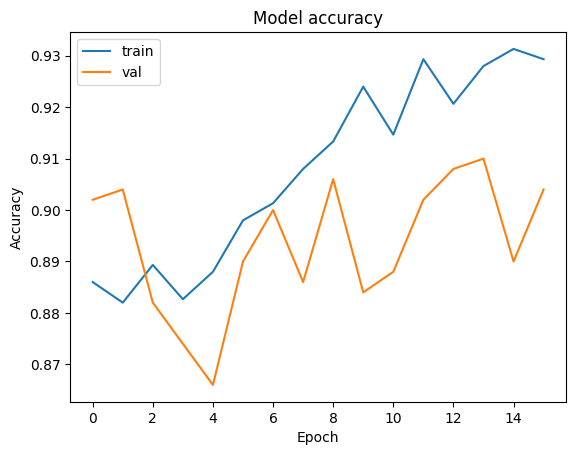

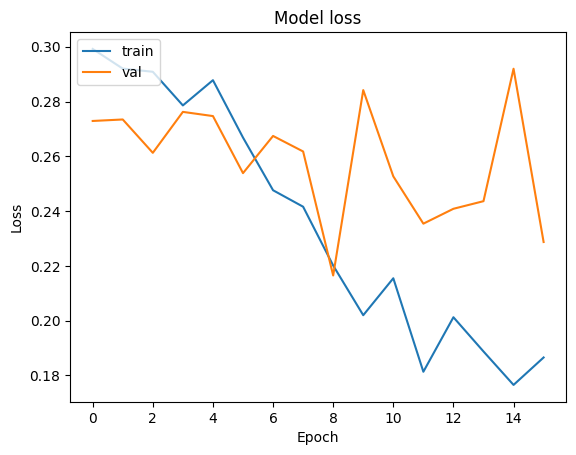

accuracy
0.9039999842643738
test loss
0.22868900001049042


<Figure size 640x480 with 0 Axes>

In [34]:
# plot accuracy
print(train_history.history.keys())
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.clf()

print('accuracy')
print(evaluate_history[1])
print('test loss')
print(evaluate_history[0])

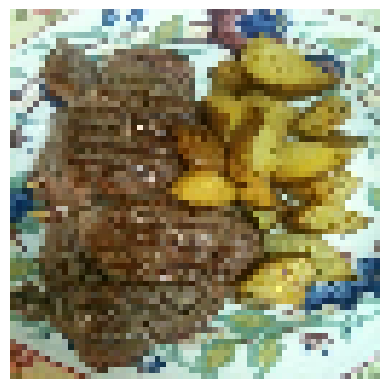

In [35]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

test_image = image.load_img('/content/drive/MyDrive/PROJECT/test/steak/138754.jpg', target_size=(64, 64))
plt.imshow(test_image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [36]:
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/PROJECT/test/steak/138754.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'steak'
else:
  prediction = 'pizza'
print(prediction)

1/1 [==============================] - 0s 43ms/step
steak
